Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

Dataset:

Dataset Link: jamboree_admission.csv

Column Profiling:

Serial No. (Unique row ID)
GRE Scores (out of 340)
TOEFL Scores (out of 120)
University Rating (out of 5)
Statement of Purpose and Letter of Recommendation Strength (out of 5)
Undergraduate GPA (out of 10)
Research Experience (either 0 or 1)
Chance of Admit (ranging from 0 to 1)
Concept Used:

Exploratory Data Analysis
Linear Regression
What does good looks like?

Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.
Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.
Use Non-graphical and graphical analysis for getting inferences about variables.
This can be done by checking the distribution of variables of graduate applicants.
Once you’ve ensured that students with varied merit apply for the university, you can start understanding the relationship between different factors responsible for graduate admissions.
Check correlation among independent variables and how they interact with each other.
Use Linear Regression from (Statsmodel library) and explain the results.
Test the assumptions of linear regression:
Multicollinearity check by VIF score
Mean of residuals
Linearity of variables (no pattern in residual plot)
Test for Homoscedasticity
Normality of residuals
Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.
Provide actionable Insights & Recommendations
Try out different Linear Regressions
Evaluation Criteria (100 Points):

Define Problem Statement and perform Exploratory Data Analysis (10 points)
Definition of problem (as per given problem statement with additional views)
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required) , missing value detection, statistical summary.
Univariate Analysis (distribution plots of all the continuous variable(s) barplots/countplots of all the categorical variables)
Bivariate Analysis (Relationships between important variables such as workday and count, season and count, weather and count.
Illustrate the insights based on EDA
Comments on range of attributes, outliers of various attributes
Comments on the distribution of the variables and relationship between them
Comments for each univariate and bivariate plots
Data Preprocessing (10 Points)
Duplicate value check
Missing value treatment
Outlier treatment
Feature engineering
Data preparation for modeling
Model building (10 Points)
Build the Linear Regression model and comment on the model statistics
Display model coefficients with column names
Try out Ridge and Lasso regression
Testing the assumptions of the linear regression model (50 Points)
Multicollinearity check by VIF score (variables are dropped one-by-one till none has VIF>5) (10 Points)
The mean of residuals is nearly zero (10 Points)
Linearity of variables (no pattern in the residual plot) (10 Points)
Test for Homoscedasticity (10 Points)
Normality of residuals (almost bell-shaped curve in residuals distribution, points in QQ plot are almost all on the line) (10 Points)
Model performance evaluation (10 Points)
Metrics checked - MAE, RMSE, R2, Adj R2
Train and test performances are checked
Comments on the performance measures and if there is any need to improve the model or not
Actionable Insights & Recommendations (10 Points)
Comments on significance of predictor variables
Comments on additional data sources for model improvement, model implementation in real world, potential business benefits from improving the model (These are key to differentiating a good and an excellent solution)
Submission Process:

Type your insights and recommendations in the text editor.
Convert your jupyter notebook into PDF (Save as PDF using Chrome browser’s Print command), upload it on our platform
Optionally, you may add images/graphs in the text editor by taking screenshots or saving matplotlib graphs using plt.savefig(...).
After submitting, you will not be allowed to edit your submission.

In [254]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm
import statsmodels.stats.api as sms

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [176]:
path = r'Jamboree_Admission.csv'

In [177]:
df = pd.read_csv(path)
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [179]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [180]:
df.drop(columns = ['Serial No.'], inplace= True)

In [181]:
df.rename({df.columns[-1]: "Chance_of_Admit"}, axis = 1, inplace = True)

In [182]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

The data does not have any duplicates. Lets move ahead

In [183]:
## let's try to find out the number of unique values for each column along with total number of rows
print("total number of rows in the df are:", df.shape[0])
for col in df.columns:
    print("------------------------------------------")
    print(f"Total # of unique values in {col} are: {df[col].nunique()}") 

total number of rows in the df are: 500
------------------------------------------
Total # of unique values in GRE Score are: 49
------------------------------------------
Total # of unique values in TOEFL Score are: 29
------------------------------------------
Total # of unique values in University Rating are: 5
------------------------------------------
Total # of unique values in SOP are: 9
------------------------------------------
Total # of unique values in LOR  are: 9
------------------------------------------
Total # of unique values in CGPA are: 184
------------------------------------------
Total # of unique values in Research are: 2
------------------------------------------
Total # of unique values in Chance_of_Admit are: 61


------------------------------------------
Range of values in GRE Score are: 50
Median of values in GRE Score is: 317.0


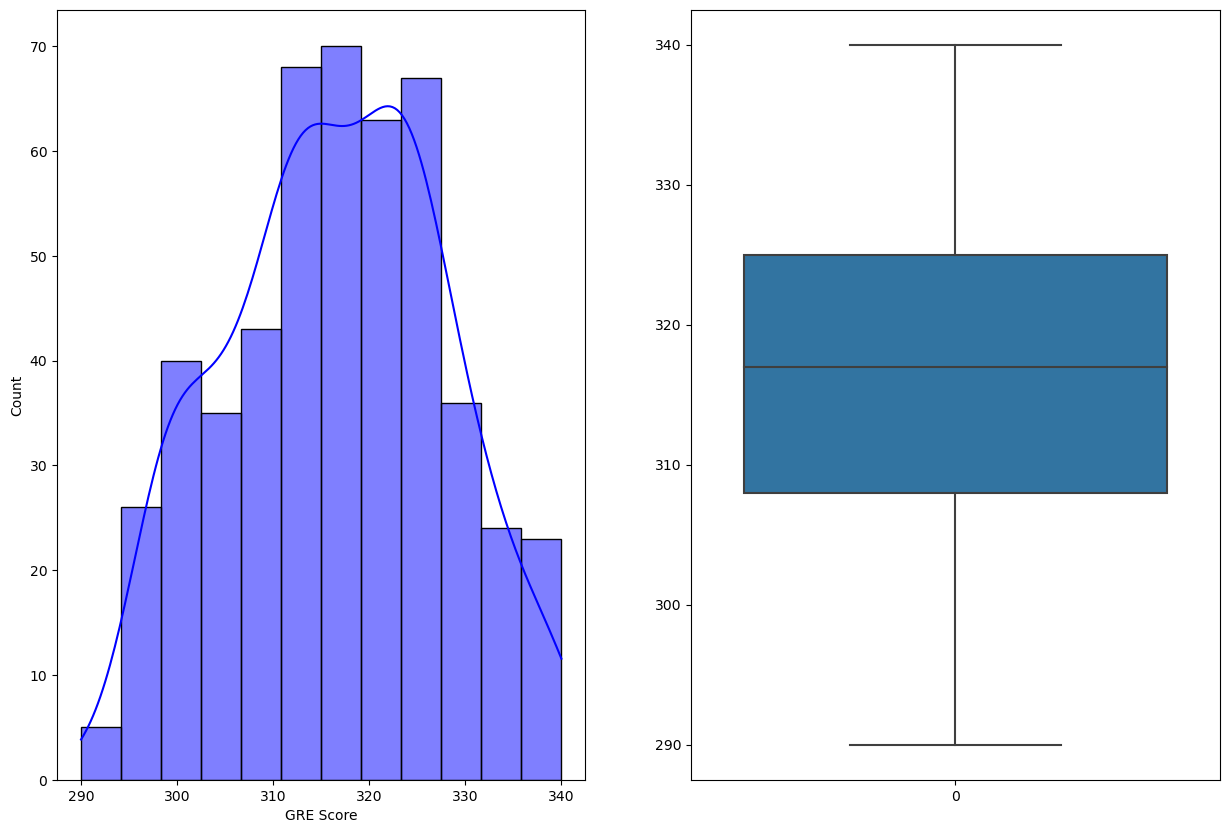

------------------------------------------
Range of values in TOEFL Score are: 28
Median of values in TOEFL Score is: 107.0


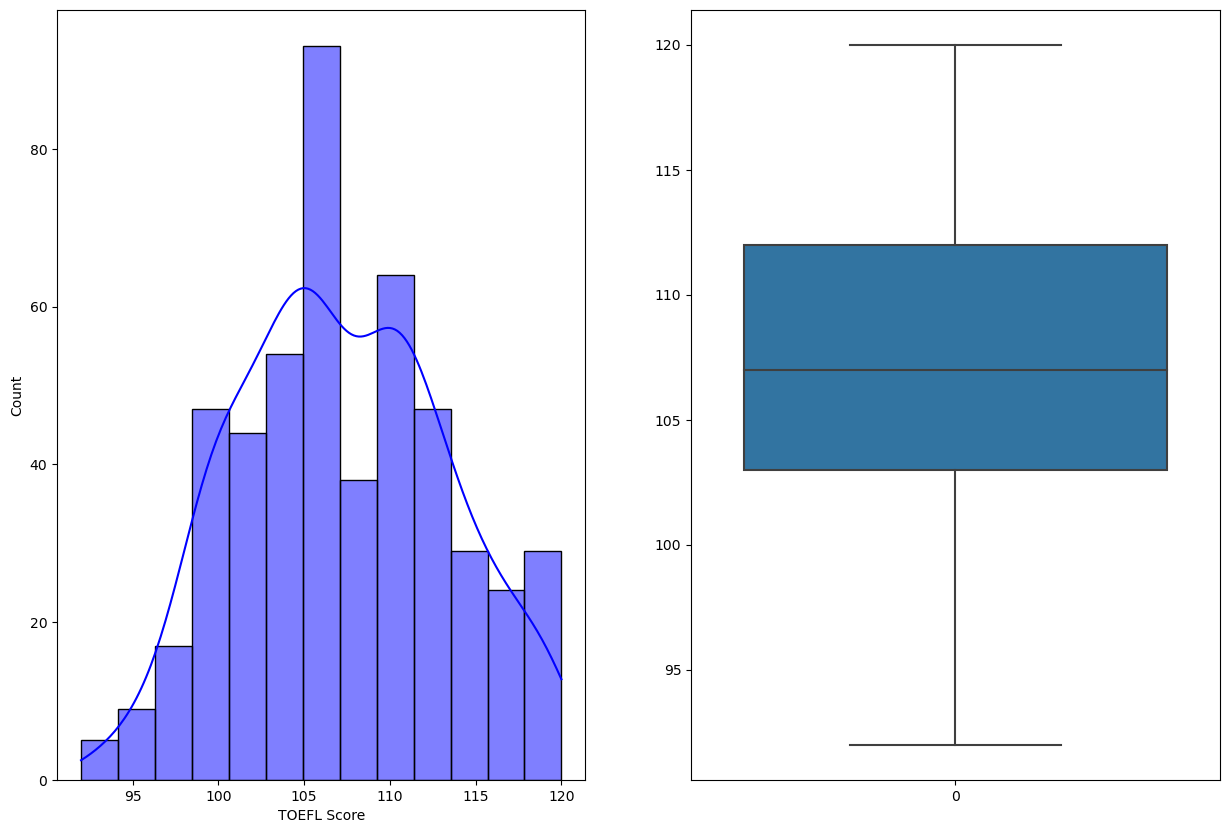

------------------------------------------
Range of values in University Rating are: 4
Median of values in University Rating is: 3.0


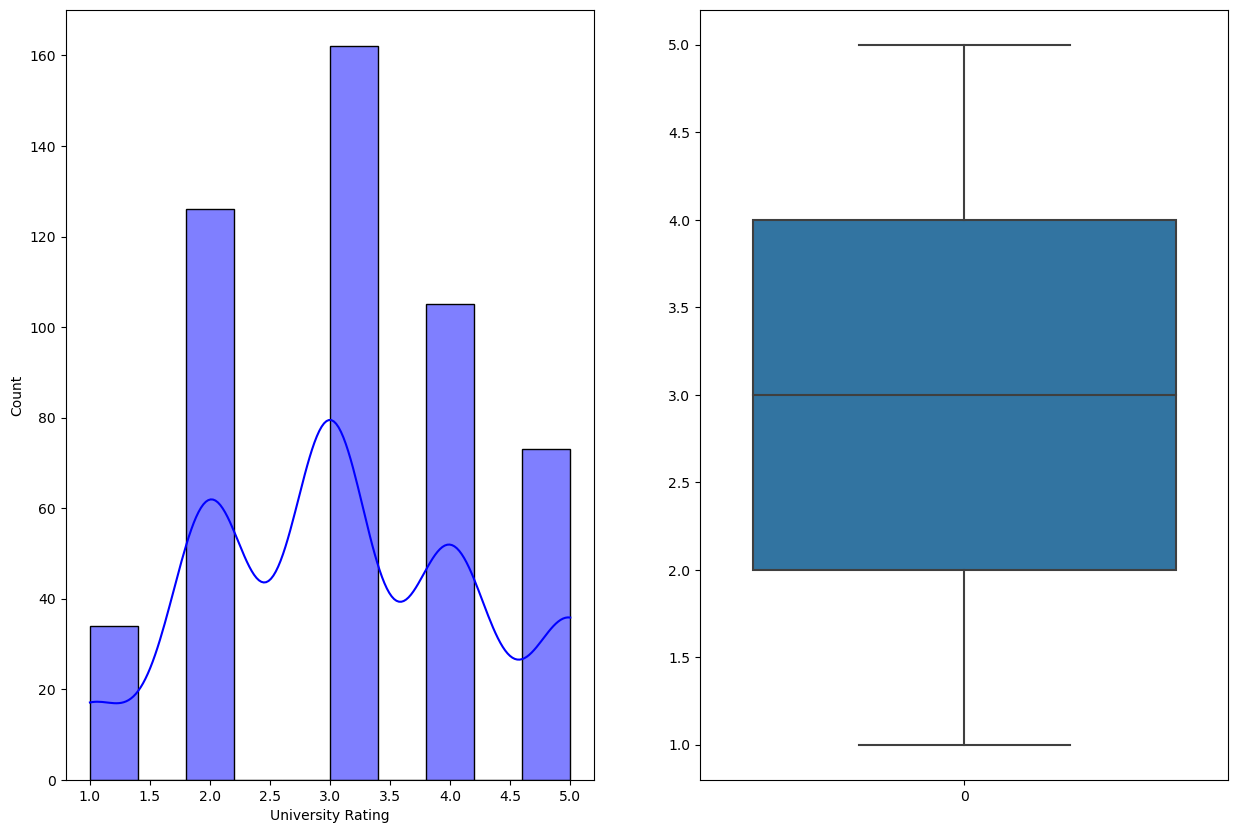

------------------------------------------
Range of values in SOP are: 4.0
Median of values in SOP is: 3.5


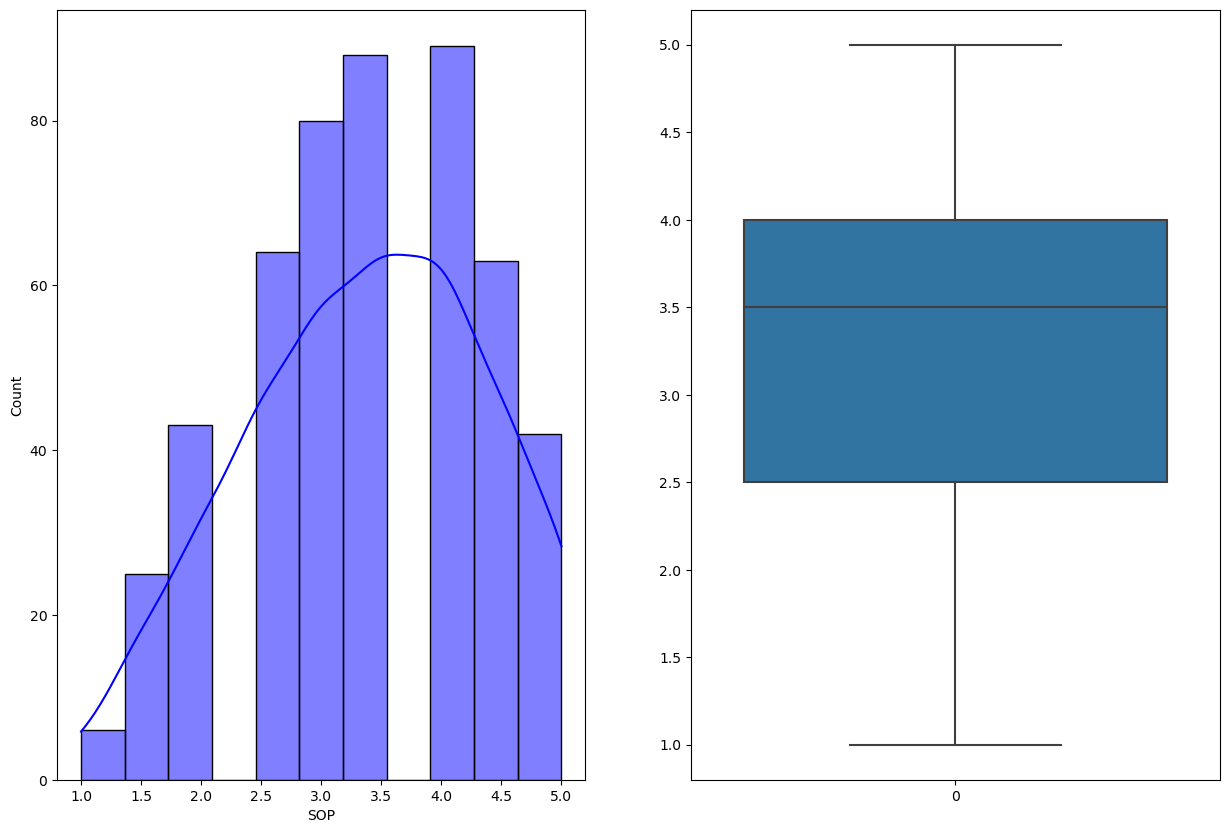

------------------------------------------
Range of values in LOR  are: 4.0
Median of values in LOR  is: 3.5


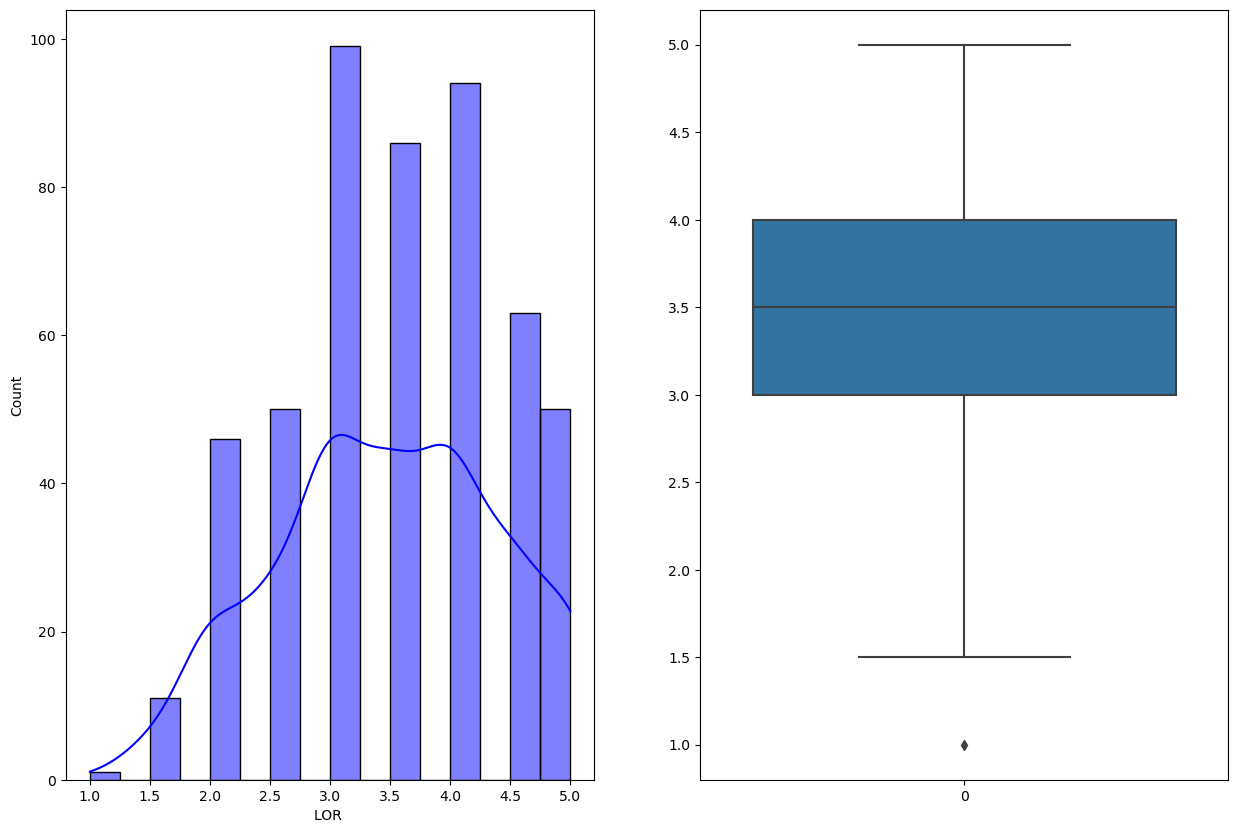

------------------------------------------
Range of values in CGPA are: 3.12
Median of values in CGPA is: 8.56


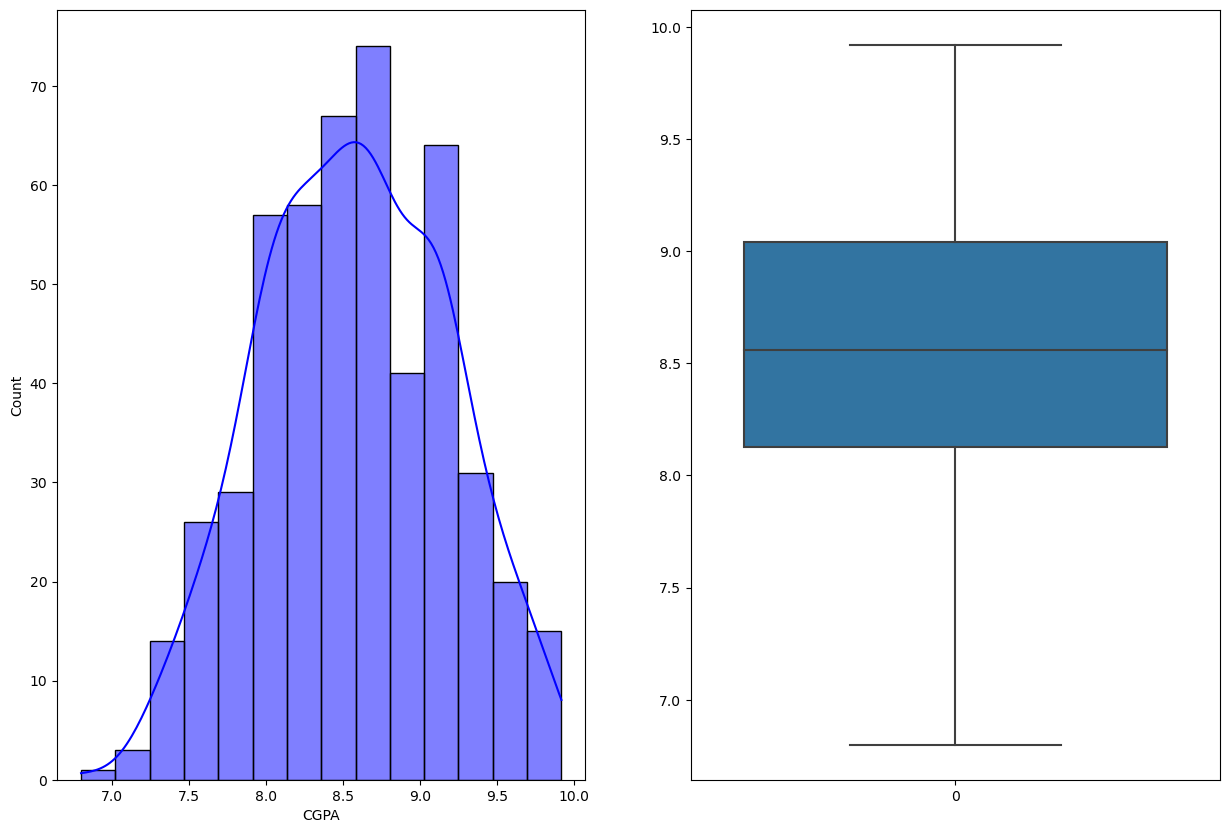

------------------------------------------
Range of values in Research are: 1
Median of values in Research is: 1.0


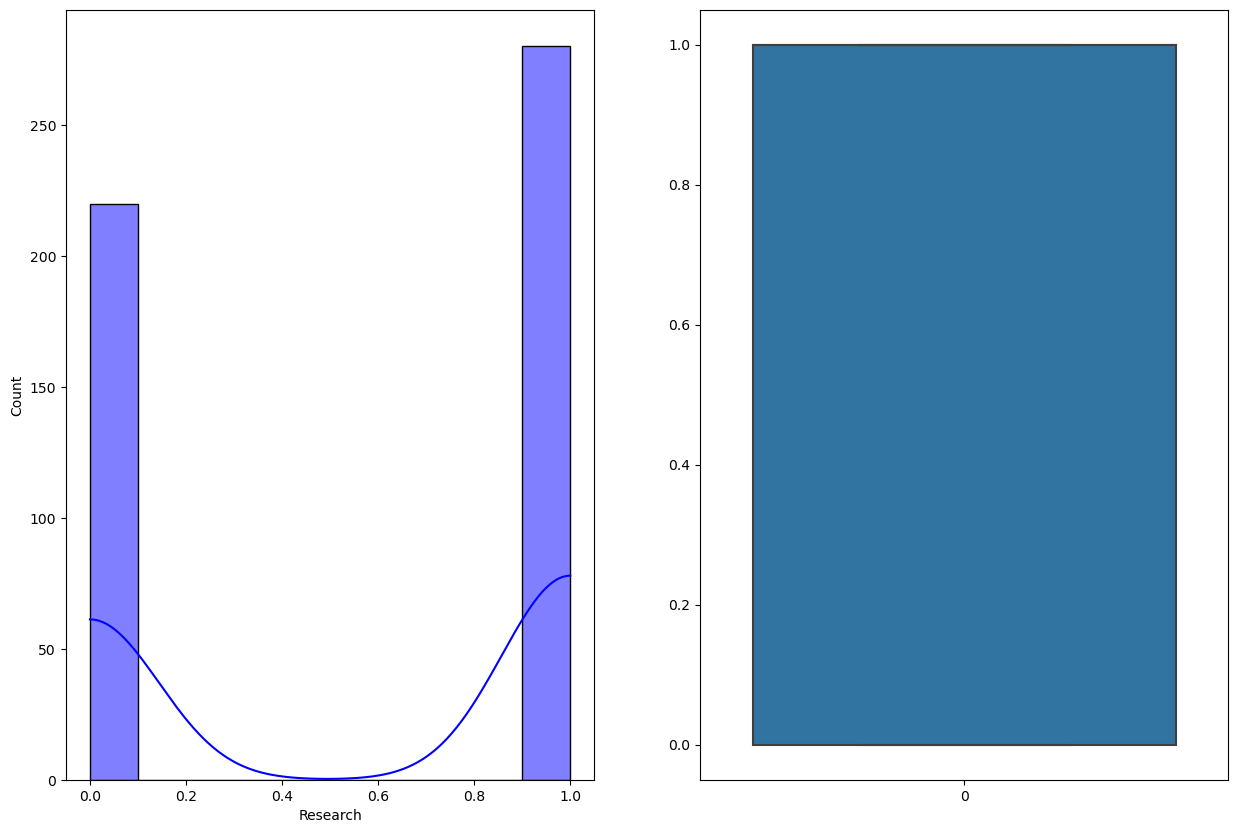

------------------------------------------
Range of values in Chance_of_Admit are: 0.6299999999999999
Median of values in Chance_of_Admit is: 0.72


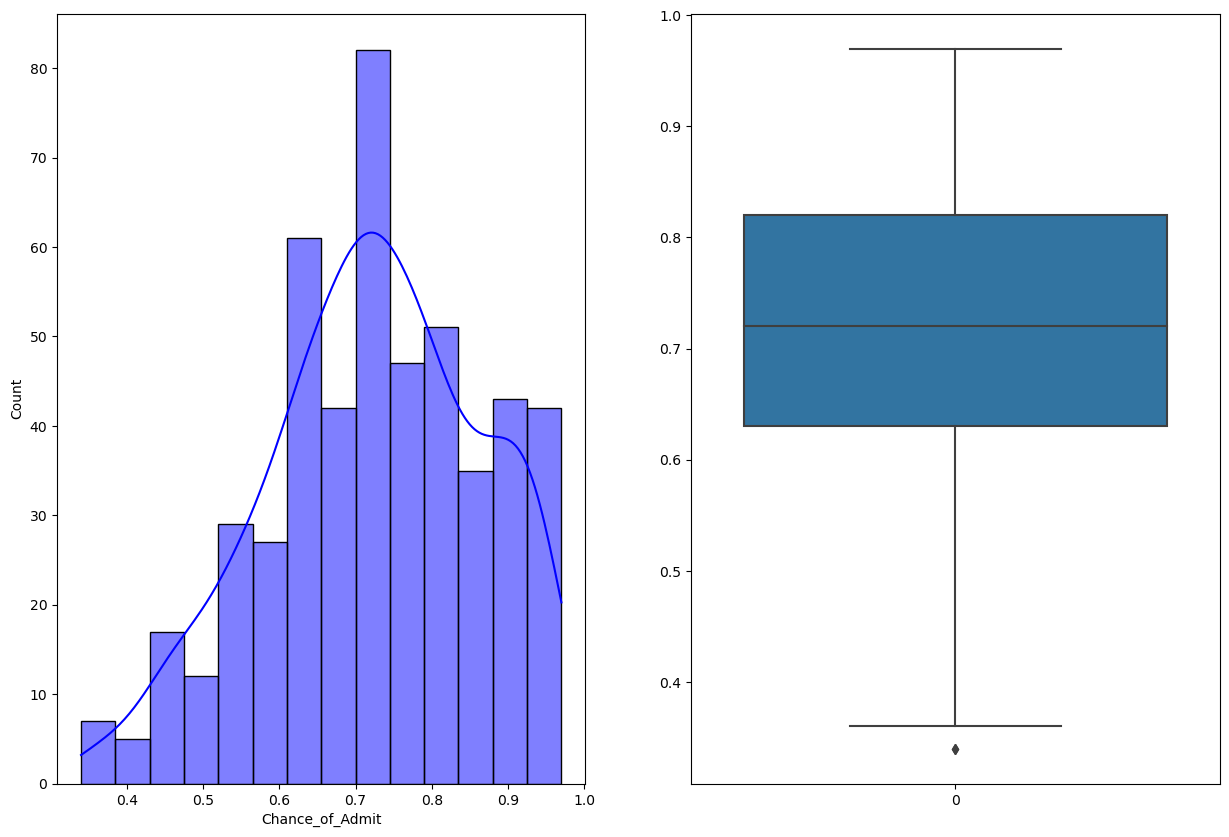

In [184]:
## to find out the range and median of each column, lets do a histogram and box plot of each column
for col in df.columns:
    print("------------------------------------------")
    print(f"Range of values in {col} are: {df[col].max() - df[col].min()}")
    print(f"Median of values in {col} is: {df[col].median()}")
    plt.figure(figsize = (15,10))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde = True, color = 'b')
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.show()

``` There are mostly no outliers in the data. ```

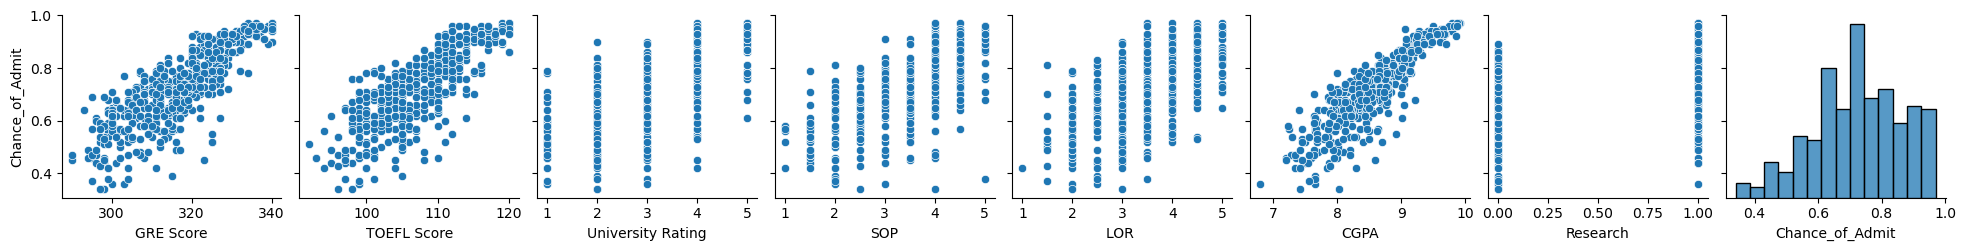

In [185]:
#### Lets do a pairwise plot for the independent variables with the dependent variable 

sns.pairplot(data = df, y_vars = ['Chance_of_Admit'])
plt.show()

```` 
1. GRE, TOEFL, CGPA have high correlation with the Chance of Admit
2. Research has no impact on the Chance of Admit
3. The variables University Rating, SOP and LOR are more of discrete variables
````

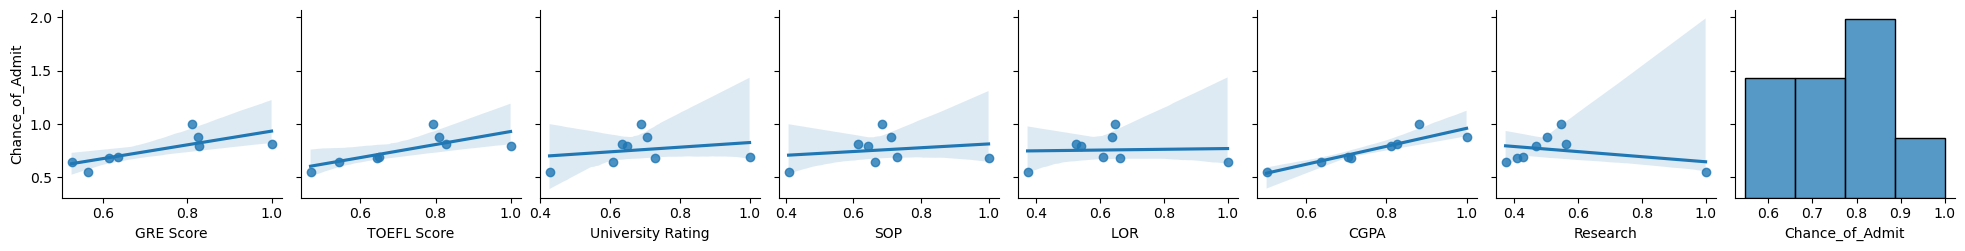

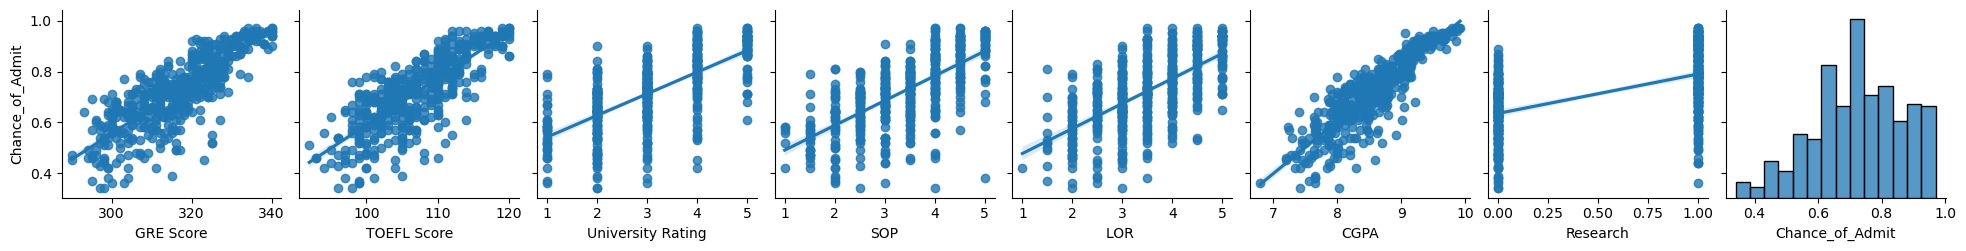

In [186]:
sns.pairplot(data = df.corr(), y_vars = 'Chance_of_Admit', kind = 'reg')
sns.pairplot(data = df, y_vars = "Chance_of_Admit", kind ='reg')
plt.show()

------------------------------------------
GRE Score


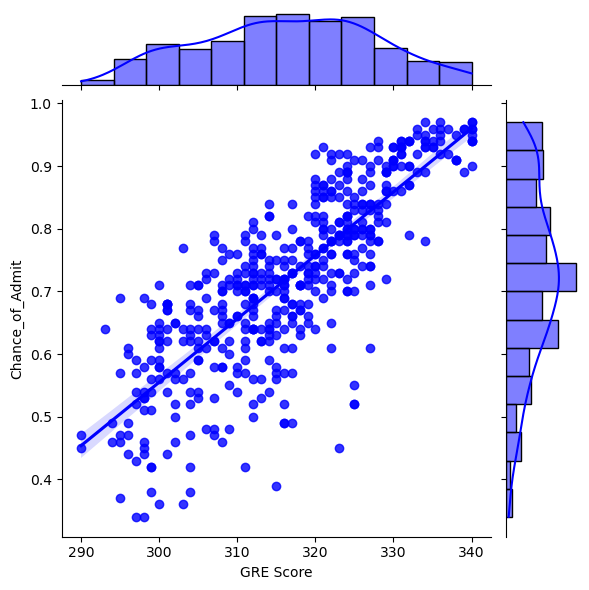

------------------------------------------
TOEFL Score


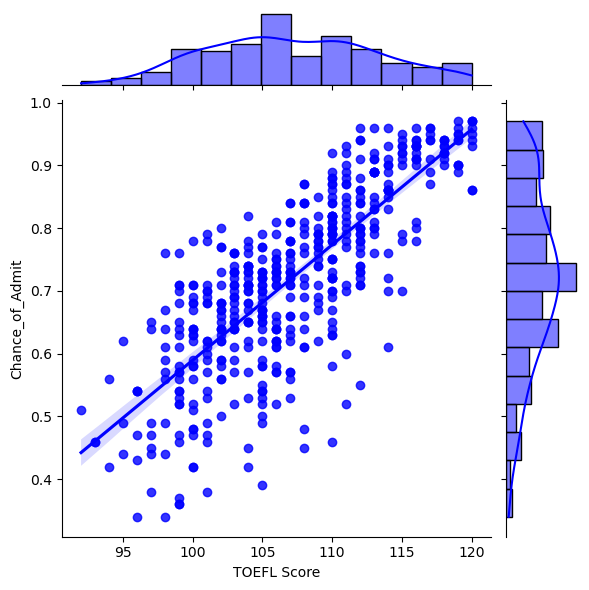

------------------------------------------
University Rating


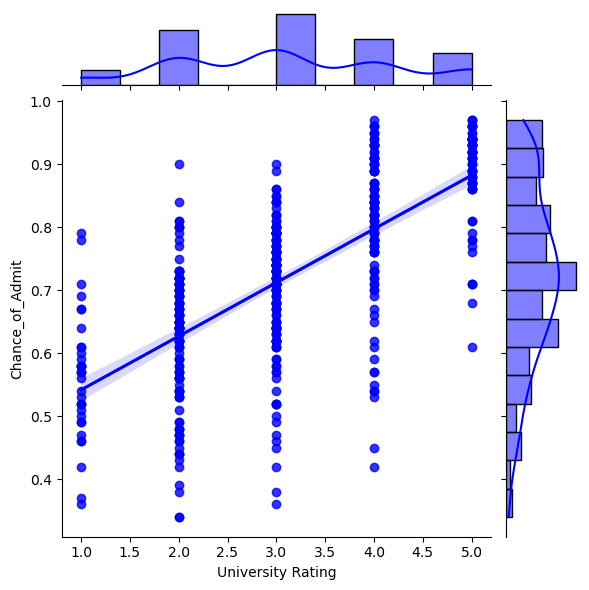

------------------------------------------
SOP


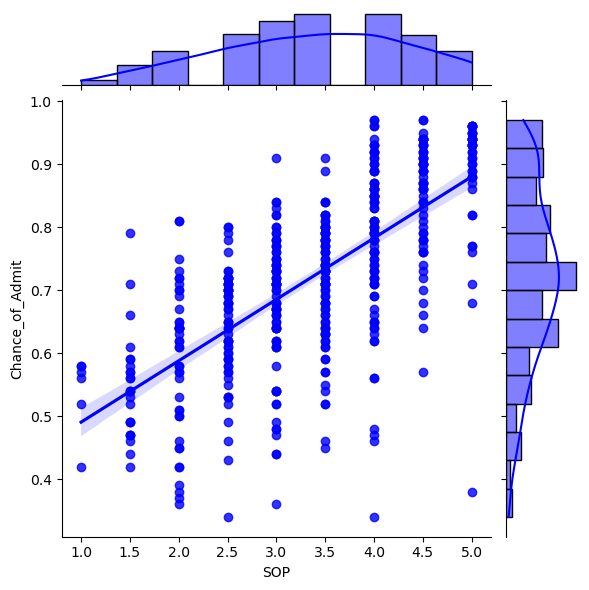

------------------------------------------
LOR 


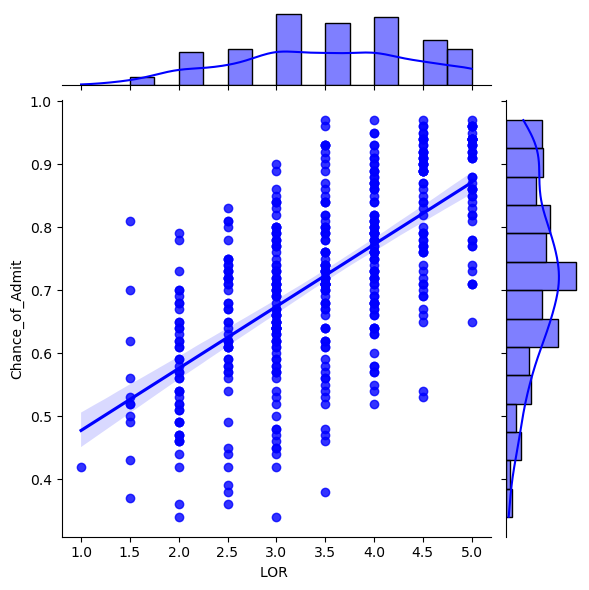

------------------------------------------
CGPA


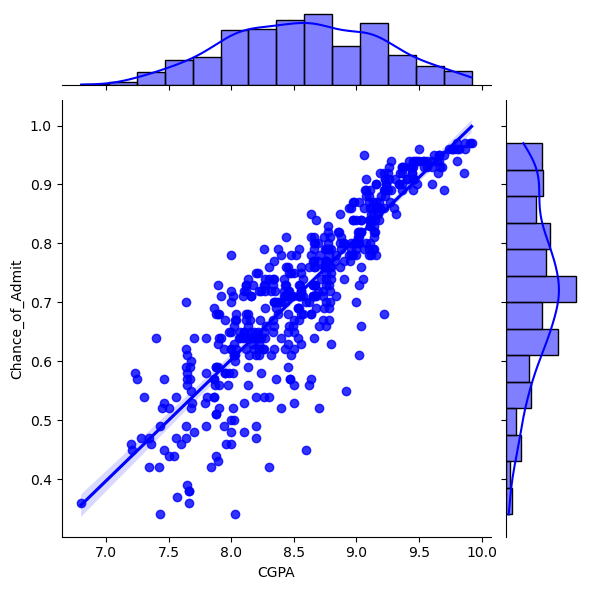

------------------------------------------
Research


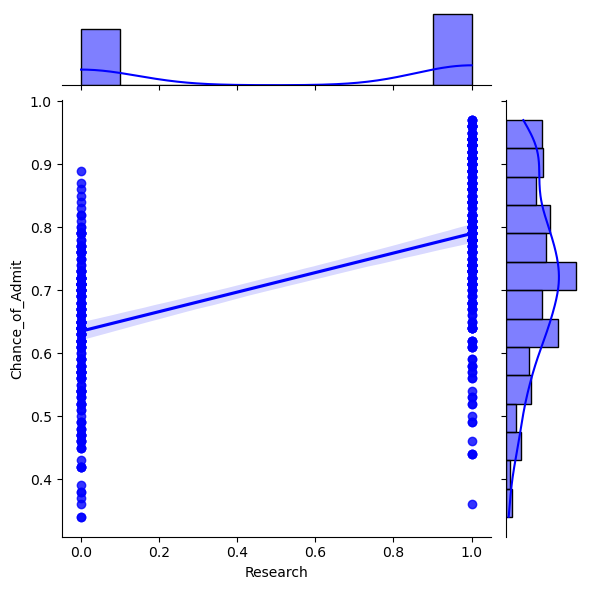

------------------------------------------
Chance_of_Admit


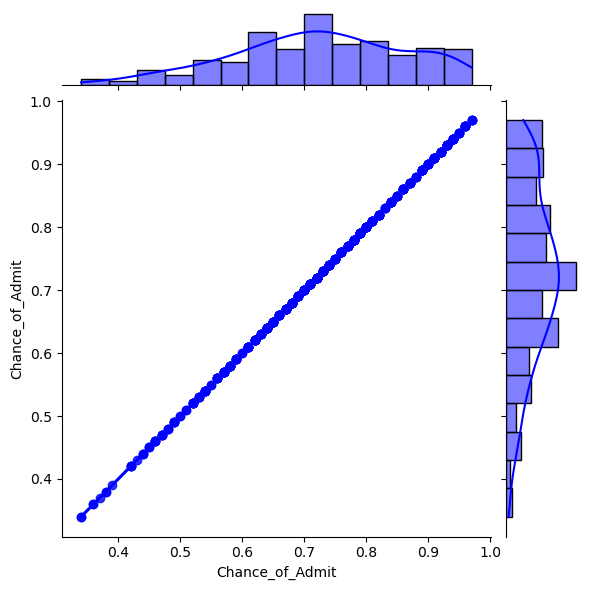

In [187]:
for col in df.columns:
    print("------------------------------------------")
    print(col)
    sns.jointplot(data = df, x = col, y = "Chance_of_Admit", kind = 'reg', color = 'b')
    plt.show()

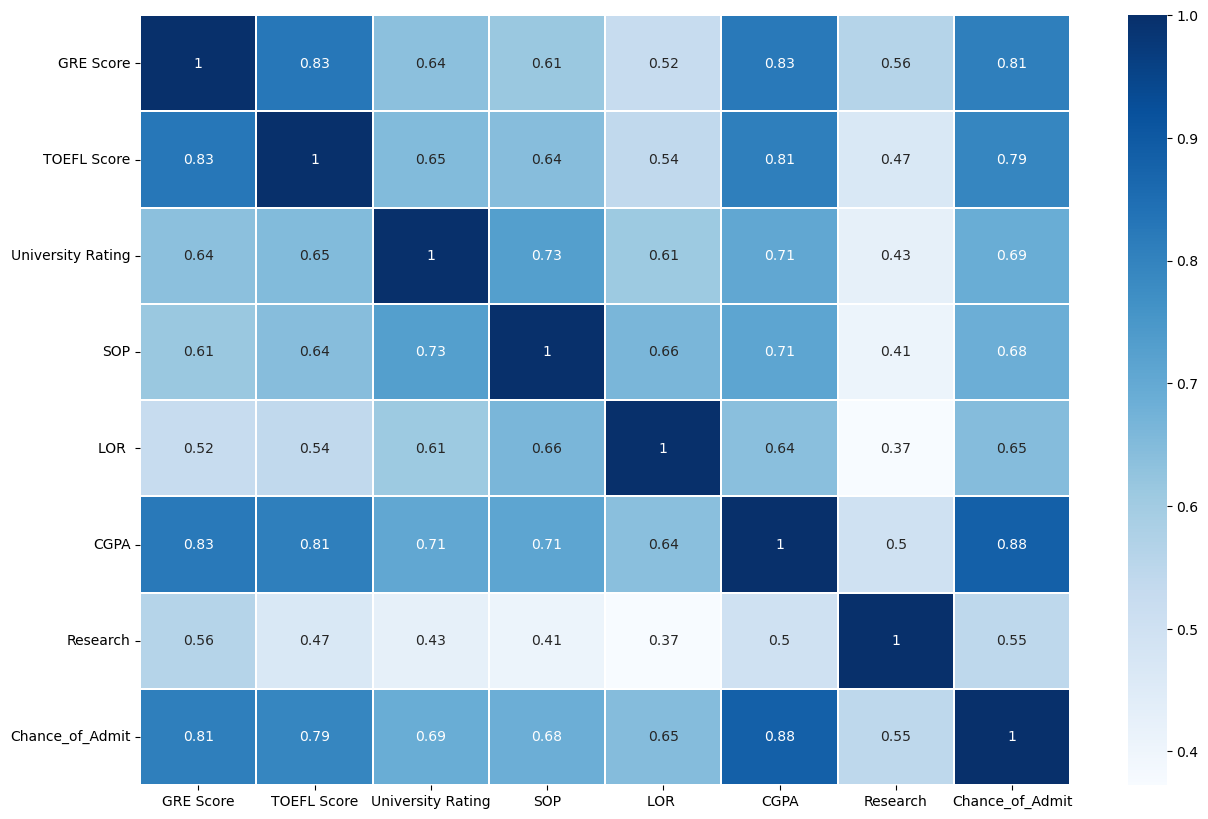

In [188]:
## lets do heatmap of the features and the target variable

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidths = 0.1)
plt.show()

In [189]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [190]:
## trying train test split now

x = df_scaled.iloc[:, :-1]
y = df_scaled.iloc[:, -1]
print(x.shape, y.shape)

(500, 7) (500,)


In [191]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(f"x train shape{xtrain.shape}")
print(f"x test shape{xtest.shape}")
print(f"y train shape{ytrain.shape}")
print(f"y test shape{ytest.shape}")

x train shape(400, 7)
x test shape(100, 7)
y train shape(400,)
y test shape(100,)


In [192]:
lr_model = LinearRegression()
lr_model.fit(xtrain, ytrain)


LinearRegression()

In [193]:
y_pred_train = lr_model.predict(xtrain)
y_pred_test = lr_model.predict(xtest)

In [194]:
#### train score
r2_score(ytrain, y_pred_train)

0.8210671369321554

In [195]:
r2_score(ytest, y_pred_test)

0.8188432567829628

In [196]:
[attr for attr in dir(lr_model) if '__' not in attr]

['_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n_jobs',
 'positive',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [197]:
lr_model_weights = pd.DataFrame(lr_model.coef_.reshape(1,-1), columns = df.columns[:-1])
lr_model_weights['Intercept'] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.194823,0.129095,0.020812,0.012735,0.113028,0.482199,0.084586,0.007736


```
1. CGPA,GRE,TOEFL scores have the highest weight
2. SOP, University rating, and research have the lowest weights
3. W0 - intercept is low
```

In [198]:
def model_evaluation(y_actual, y_forecast, model):
    n = len(y_actual)
    
    if len(model.coef_.shape) == 1:
        p = len(model.coef_)
    else:
        p = len(model.coef_[0])
    
    MSE = np.round(mean_squared_error(y_true = y_actual, y_pred= y_forecast, squared= True), 2)
    MAE = np.round(mean_absolute_error(y_true = y_actual, y_pred= y_forecast), 2)
    RMSE = np.round(mean_squared_error(y_true = y_actual, y_pred= y_forecast, squared= False), 2)

    r2 = np.round(r2_score(y_true = y_actual, y_pred = y_forecast), 2)
    adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)

    return print(f"MSE: {MSE}\n MAE: {MAE}\n RMSE: {RMSE}\n r2:{r2}\n adj_r2:{adj_r2}")

In [199]:
model_evaluation(y_actual= ytrain, y_forecast= y_pred_train, model= lr_model)

MSE: 0.18
 MAE: 0.3
 RMSE: 0.42
 r2:0.82
 adj_r2:0.82


In [200]:
model_evaluation(y_actual= ytest, y_forecast= y_pred_test, model= lr_model) 

MSE: 0.19
 MAE: 0.3
 RMSE: 0.43
 r2:0.82
 adj_r2:0.81


```
Since there is no difference in the training and test scores of the data, we can conclude that the the model is not overfitting
```

In [201]:
xtrain_new = sm.add_constant(xtrain)
ols_model = sm.OLS(ytrain, xtrain_new)
result = ols_model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 08 Sep 2024   Prob (F-statistic):          3.41e-142
Time:                        16:47:12   Log-Likelihood:                -221.69
No. Observations:                 400   AIC:                             459.4
Df Residuals:                     392   BIC:                             491.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0077      0.02

In [221]:
## checking variance infaltin factor for each variable

vif = pd.DataFrame()
vif['Variable'] = xtrain.columns
vif['VIF'] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]
vif

,Variable,VIF
0,GRE Score,4.489201
1,TOEFL Score,3.665067
2,University Rating,2.571847
3,SOP,2.785753
4,LOR,1.977668
5,CGPA,4.653698
6,Research,1.517206


``` 
the variance inflation factor is less than 5 for each predictor/feature variable
Hence, no multi-collineaity
```

In [227]:
### looking at the residuals to check if the model is biased or no
residual_train = (ytrain - y_pred_train)
residual_test = (ytest- y_pred_test)

print("mean residual for train data-> ",np.mean(residual_train))
print("mean residual for test data-> ", np.mean(residual_test))

mean residual for train data->  1.8318679906315084e-17
mean residual for test data->  -0.03867840379282769


<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

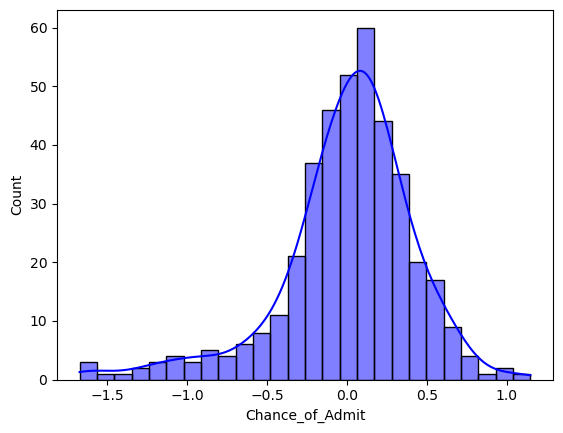

In [229]:
sns.histplot(data = residual_train, kde= True, color = 'b')

<Axes: xlabel='Chance_of_Admit', ylabel='Count'>

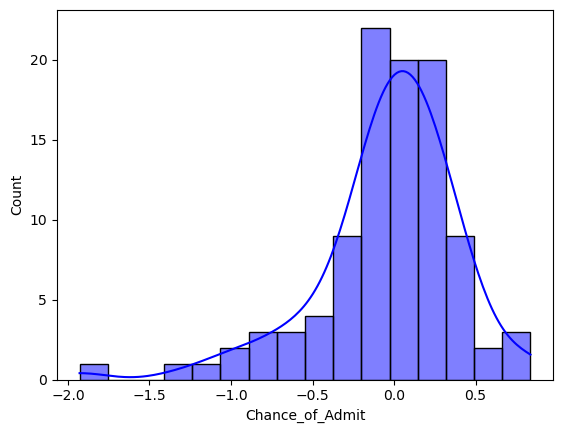

In [232]:
sns.histplot(data = residual_test, kde = True, color = 'b')

#### Model is unbaised since the mean of residual is close to zero

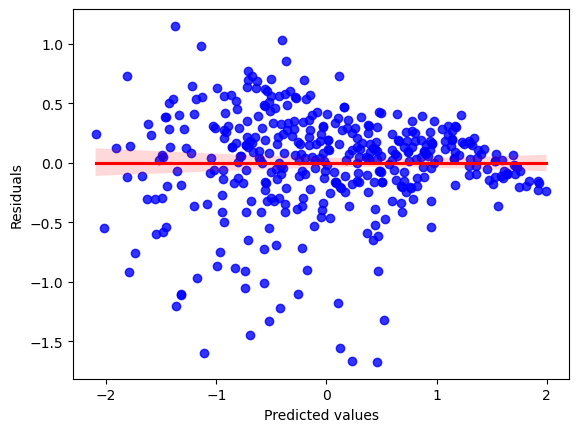

In [243]:
sns.regplot(x = y_pred_train, y = residual_train, color = 'b', line_kws = {'color': 'red'})
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()


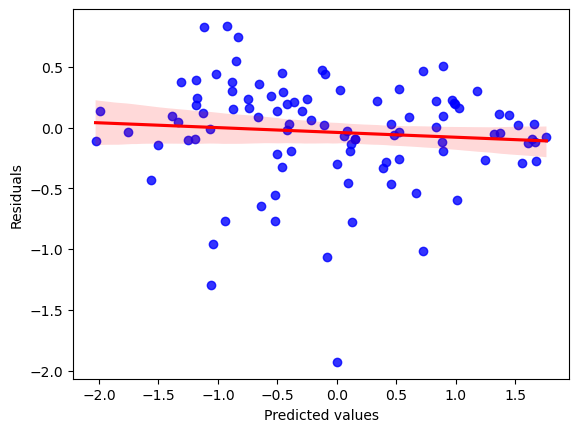

In [244]:
sns.regplot(x = y_pred_test, y = residual_test, color = 'b', line_kws = {'color': 'red'})
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

#### The assumption of linearity in the data is true since the above 2 plots have no trend in them

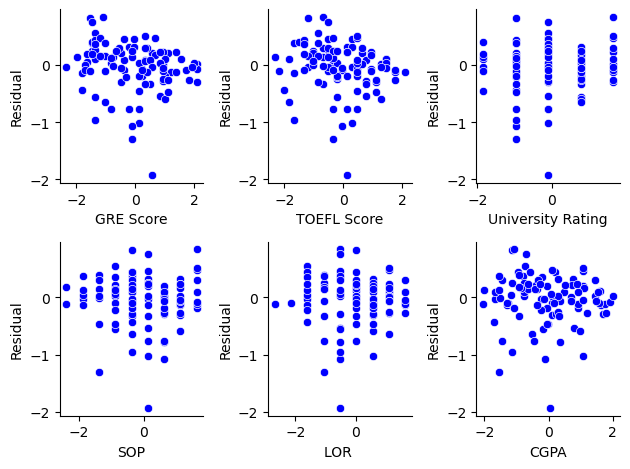

In [253]:
#plt.figure(figsize = (15,8))
i = 1
for col in xtest.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x = xtest[col].values, y = residual_test.values, color = 'b')
    plt.xlabel(col)
    plt.ylabel('Residual')
    sns.despine()
    i+=1

plt.tight_layout()
plt.show()


```not much change in the spread of residual with respect to each independent variable. therefore, Homoscedasticity is met.```

### Using Lasso(L1) and Ridge Regression (L2)

```
Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

Lasso Regression: Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

Ridge Regression: Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

The main differences between Ridge and Lasso regression are:

Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero
```

In [258]:
model_lasso = Lasso(alpha = 0.45)
model_lasso.fit(xtrain, ytrain)

Lasso(alpha=0.45)

In [256]:
model_ridge = Ridge(alpha = 0.45)
model_ridge.fit(xtrain, ytrain)

Ridge(alpha=0.45)

In [259]:
y_pred_train_lasso = model_lasso.predict(xtrain)
y_pred_test_lasso = model_lasso.predict(xtest)

y_pred_train_ridge = model_ridge.predict(xtrain)
y_pred_test_ridge = model_ridge.predict(xtest)  

In [260]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1), columns = df.columns[:-1])
lasso_model_weights['Intercept'] = model_lasso.intercept_
lasso_model_weights


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.019231,0.0,0.0,0.0,0.0,0.408647,0.0,0.013919


In [261]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1), columns = df.columns[:-1])
ridge_model_weights['Intercept'] = model_ridge.intercept_   
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.195171,0.129539,0.021157,0.013218,0.113117,0.480351,0.084625,0.007731


In [262]:
print('Linear Regression Training Accuracy\n')
model_evaluation(ytrain.values, y_pred_train, lr_model)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(ytest.values, y_pred_test, lr_model)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(ytrain.values, y_pred_train_ridge, model_ridge)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(ytest.values, y_pred_test_ridge, model_ridge)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(ytrain.values, y_pred_train_lasso, model_lasso)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(ytest.values, y_pred_test_lasso, model_lasso)
print('---'*25)

Linear Regression Training Accuracy

MSE: 0.18
 MAE: 0.3
 RMSE: 0.42
 r2:0.82
 adj_r2:0.82
*************************

Linear Regression Test Accuracy

MSE: 0.19
 MAE: 0.3
 RMSE: 0.43
 r2:0.82
 adj_r2:0.81
---------------------------------------------------------------------------

Ridge Regression Training Accuracy

MSE: 0.18
 MAE: 0.3
 RMSE: 0.42
 r2:0.82
 adj_r2:0.82
*************************


Ridge Regression Test Accuracy

MSE: 0.19
 MAE: 0.3
 RMSE: 0.43
 r2:0.82
 adj_r2:0.81
---------------------------------------------------------------------------


Lasso Regression Training Accuracy

MSE: 0.43
 MAE: 0.52
 RMSE: 0.65
 r2:0.57
 adj_r2:0.56
*************************


Lasso Regression Test Accuracy

MSE: 0.43
 MAE: 0.51
 RMSE: 0.65
 r2:0.58
 adj_r2:0.55
---------------------------------------------------------------------------


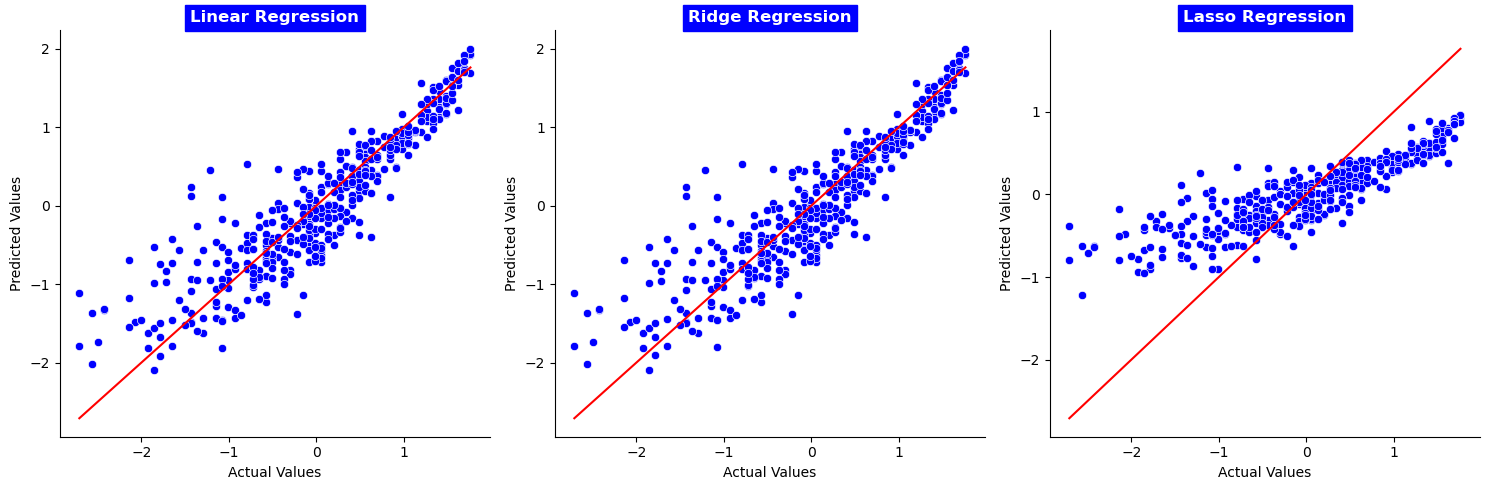

In [265]:
actual_values = ytrain.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds, color='b')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1], fontweight='bold',backgroundcolor='b',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

```
Lasso model has oversimplified the model or has the high bias
```

## Insights

```
1 CGPA emerges as the most influential feature in predicting admission chances

2. Low multicollinearity among predictors/features

3. Despite the absence of high multicollinearity, the residual plots indicate some level of heteroscedasticity.

4. Ridge and Lasso regression are comparable to the Linear Regression.

```